# Redes Neuronale
# Ejemplos Varios<a class="tocSkip">
## Reconocimiento de Patrones <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

# Modelos de redes neuronales en Scikit-learn

Para crear modelos basado en redes neuronales con scikit-learn, se utilizan las clases sklearn.neural_network.MLPRegressor para regresión y sklearn.neural_network.MLPClassifier para clasificación.

Son muchos los argumentos que controlan el comportamiento de este tipo de modelos. Afortunadamente, los responsables de su implementación han establecido valores por defecto que suelen funcionar adecuadamente en muchos escenarios. A continuación, se muestran los más influyentes:

hidden_layer_sizes: número y tamaño de las capas ocultas. Por ejemplo, (100) para una única capa oculta con 100 neuronas, y (16, 16) para dos capas ocultas de 16 neuronas de cada una. El valor por defecto es (100,).

activation: función de activación de las capas ocultas. Puede ser: {'identity', 'logistic', 'tanh', 'relu'}. La misma función de activación se aplica a todas las capas ocultas, no se permiten distintas. El valor por defecto es 'relu'.

solver: el algoritmo de optimización utilizado para aprender los pesos y bias de la red. Puede ser: {'lbfgs', 'sgd', 'dam'}. Por defecto se utiliza 'adam', que es el que mejores resultados suele dar para conjuntos de datos con miles de observaciones. Para sets de datos pequeños, 'lbfgs' converge más rápido y puede conseguir mejores resultados.

alpha: regularización L2 (weight decay). El valor por defecto es 0.0001.

batch_size: tamaño de batch utilizado en los solvers estocásticos ('sgd' y 'dam'). Este parámetro se ignora si el solver es 'lbfgs'. Por defecto se utiliza min(200, n_samples).

learning_rate: estrategia para modificar el learning rate durante el entrenamiento. Solo se utiliza cuando solver='sgd'. Puede ser:

'constant': se utiliza el valor especificado en el argumento learning_rate_init durante todo el proceso de entrenamiento.

'invscaling': se reduce progresivamente el learning rate en cada iteración t utilizando una función exponecial effective_learning_rate = learning_rate_init / pow(t, power_t).

adaptive: mantiene constante el valor especificado en el argumento learning_rate_init siempre y cuando el modelo siga mejorando (reducción de la función de coste). Si entre dos épocas consecutivas el modelo no mejora un mínimo definido en el argumento tol, el learning rate se divide por 5.

learning_rate_init: valor inicial de learning rate. Solo se utiliza cuando el solver es 'sgd' o 'adam'. Por defecto el valor es 0.001.

power_t: exponent eutilizado para reducir el learning rate cuando learning_rate='invscaling'. Por defecto se emplea el valor 0.5. Solo se utiliza este argumento cuando solver='sgd'.

max_iter: número máximo de iteraciones de entrenamiento. Para los solvers estocásticos ('sgd' y 'adam') este valor se corresponde con el número de épocas (cuantas veces participa en el entrenamiento cada observación). Se emplean por defecto 200.

shuffle: si se mezclan aleatoriamente las observaciones en cada iteración. Por defecto es True.

random_state: semilla utilizada para todos los pasos del entrenaiento que requieren de valores aleatorios (inicialización depesos, splits, bias).

tolfloat: valor de tolerancia utilizado en la optimización. Si la función de coste no mejora durante n_iter_no_change iteraciones consecutivas un mínimo de tolfloat, el entrenamiento finaliza. Por defecto se emplea 1e-4.

early_stopping: detener el entrenamiento cuando la métrica de validación no mejora. Automáticamente, se separa un porcentaje de validation_fraction del conjunto de entrenamiento que se utiliza como conjunto de validación. Si durante más de n_iter_no_change iteraciones (épocas), la métrica de validación no mejora un mínimo de tol, el entrenamiento termina. Solo se aplica si solver es 'sgd' o 'adam'.

validation_fraction: fracción de datos del conjunto de entrenamiento utilizados como conjunto de validación para el early stopping. Por defecto se utiliza 0.1.

n_iter_no_change: número de épocas consecutivas sin mejora que desencadena el early stopping. Por defecto se emplean 10.

# Ejemplo clasificación

En este primer ejemplo se muestra cómo, dependiendo de la arquitectura (capas ocultas y tamaño de las mismas), un modelo basado en redes neuronales puede aprender funciones no lineales con gran facilidad. Para evitar problemas de overfitting, es importante identificar la combinación de hiperparámetros que consigue un equilibrio adecuado en el aprendizaje. Se trata de un ejemplo muy sencillo, cuyo objetivo es que el lector se familiarice con flexibilidad que tienen este tipo de modelos y en cómo realizar una búsqueda de hiperparámetros mediante grid search y validación cruzada.

# Librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modelado
# ==============================================================================
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Datos

Se simulan observaciones en dos dimensiones, pertenecientes a tres grupos, cuya separación no es perfecta.

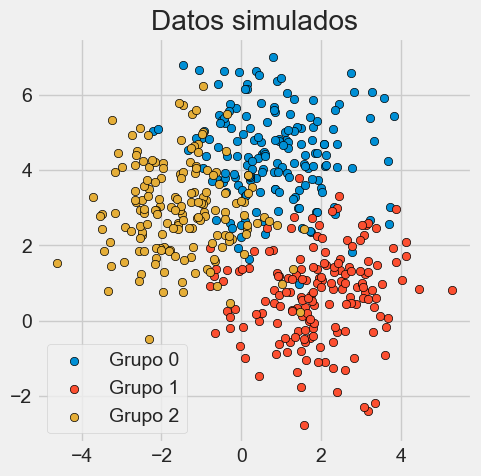

In [2]:
# Datos simulados
# ==============================================================================
X, y = make_blobs(
    n_samples    = 500,
    n_features   = 2,
    centers      = 3,
    cluster_std  = 1.2,
    shuffle      = True,
    random_state = 0
)

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black',
        label= f"Grupo {i}"
    )

ax.set_title('Datos simulados')
ax.legend();

# Arquitectura de la red

Se procede a crear 4 modelos en orden creciente de complejidad (número de neuronas y capas), para comprobar cómo la arquitectura de la red afecta a su capacidad de aprendizaje.

In [3]:
# Modelos
# ==============================================================================
modelo_1 = MLPClassifier(
    hidden_layer_sizes=(5),
    learning_rate_init=0.01,
    solver = 'lbfgs',
    max_iter = 1000,
    random_state = 123
)

modelo_2 = MLPClassifier(
    hidden_layer_sizes=(10),
    learning_rate_init=0.01,
    solver = 'lbfgs',
    max_iter = 1000,
    random_state = 123
)

modelo_3 = MLPClassifier(
    hidden_layer_sizes=(20, 20),
    learning_rate_init=0.01,
    solver = 'lbfgs',
    max_iter = 5000,
    random_state = 123
)

modelo_4 = MLPClassifier(
    hidden_layer_sizes=(50, 50, 50),
    learning_rate_init=0.01,
    solver = 'lbfgs',
    max_iter = 5000,
    random_state = 123
)

modelo_1.fit(X=X, y=y)
modelo_2.fit(X=X, y=y)
modelo_3.fit(X=X, y=y)
modelo_4.fit(X=X, y=y)

MLPClassifier(hidden_layer_sizes=(50, 50, 50), learning_rate_init=0.01,
              max_iter=5000, random_state=123, solver='lbfgs')

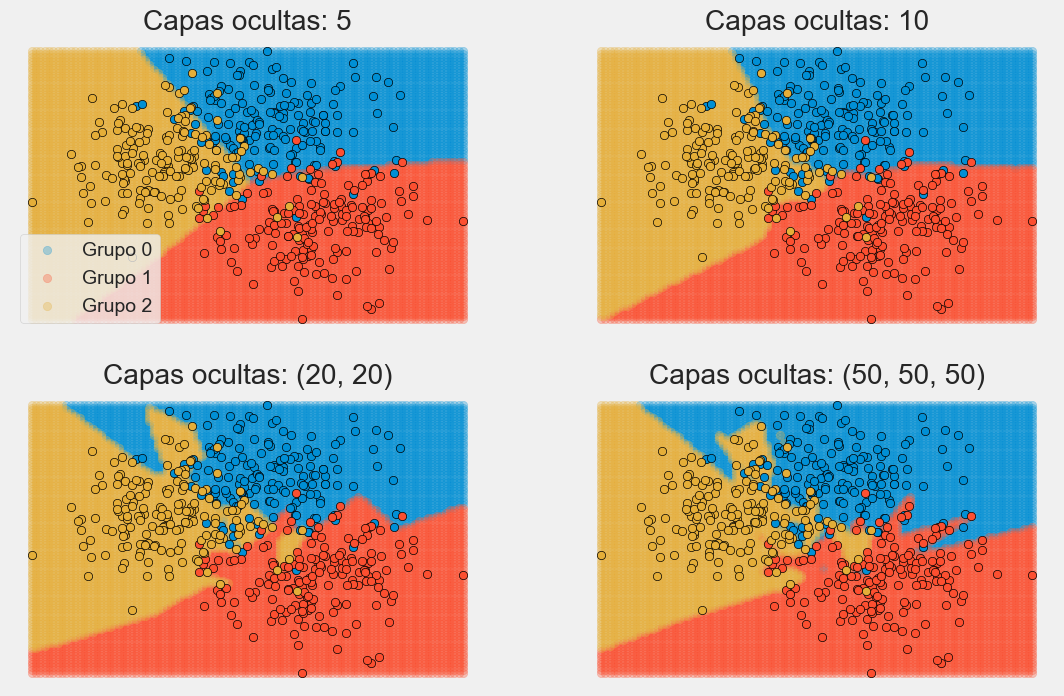

In [4]:
# Gráfico de predicciones
# ==============================================================================
fig, axs = plt.subplots(2, 2, figsize=(12,8))
axs = axs.flatten()
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)
X_grid = np.column_stack([xx.flatten(), yy.flatten()])

for i, modelo in enumerate([modelo_1, modelo_2, modelo_3, modelo_4]):

    predicciones = modelo.predict(X_grid)

    for j in np.unique(predicciones):
        axs[i].scatter(
            x = X_grid[predicciones == j, 0],
            y = X_grid[predicciones == j, 1],
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            #marker = 'o',
            alpha = 0.3,
            label= f"Grupo {j}"
        )

    for j in np.unique(y):
        axs[i].scatter(
            x = X[y == j, 0],
            y = X[y == j, 1],
            c = plt.rcParams['axes.prop_cycle'].by_key()['color'][j],
            marker    = 'o',
            edgecolor = 'black'
        )

    axs[i].set_title(f"Capas ocultas: {modelo.hidden_layer_sizes}")
    axs[i].axis('off')
axs[0].legend();

Puede observarse como, a medida que aumenta la complejidad de la red (más neuronas y más capas), las fronteras de decisión se adaptan más y más a los datos de entrenamiento.

# Optimización de hiperparámetros

En este apartado, se muestra cómo afectan al aprendizaje algunos de los hiperparámetros más influyentes. Como los 2 predictores tienen la misma escala, no es estrictamente necesarios aplicarles una normalización previo entrenamiento.



In [5]:
# Número de neuronas
# ==============================================================================
param_grid = {'hidden_layer_sizes':[1, 5, 10, 15, 25, 50]}

grid = GridSearchCV(
    estimator = MLPClassifier(
        learning_rate_init=0.01,
        solver = 'lbfgs',
        alpha  = 0,
        max_iter = 5000,
        random_state = 123
    ),
    param_grid = param_grid,
    scoring    = 'accuracy',
    cv         = 5,
    refit      = True,
    return_train_score = True
)

_ = grid.fit(X, y)

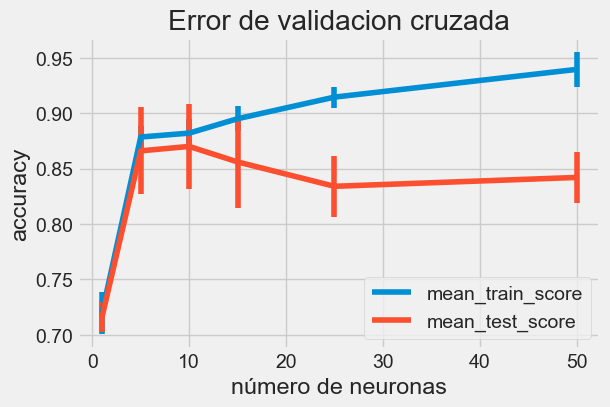

In [6]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_hidden_layer_sizes', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_hidden_layer_sizes', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_ylabel('accuracy')
ax.set_xlabel('número de neuronas')
ax.set_title('Error de validacion cruzada');

In [7]:
# learning rate
# ==============================================================================
param_grid = {'learning_rate_init':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

grid = GridSearchCV(
    estimator = MLPClassifier(
        hidden_layer_sizes=(10),
        solver = 'adam',
        alpha  = 0,
        max_iter = 5000,
        random_state = 123
    ),
    param_grid = param_grid,
    scoring    = 'accuracy',
    cv         = 5,
    refit      = True,
    return_train_score = True
)

_ = grid.fit(X, y)

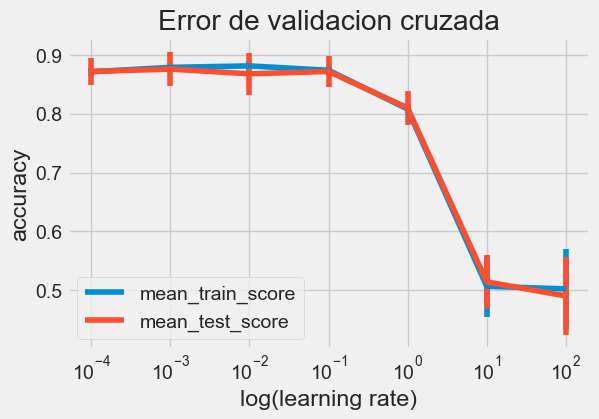

In [8]:
fig, ax = plt.subplots(figsize=(6, 3.84))
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate_init', y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_learning_rate_init', y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_xscale('log')
ax.set_xlabel('log(learning rate)')
ax.set_ylabel('accuracy')
ax.set_title('Error de validacion cruzada');

Si bien los dos ejemplos anteriores sirven para tener una idea intuitiva de cómo afecta cada hiperparámetro, no es posible optimizarlos de forma individual, ya que el impacto final que tiene cada uno depende de qué valor tomen los demás. La búsqueda de hiperparámetros debe hacerse en conjunto.


Dado el elevado número de hiperparámetros que tiene los modelos de redes neuronales, la combinación de posibles configuraciones es muy elevada. Esto hace que la búsqueda de hiperparámetros por grid search cartesiano (todas las combinaciones) sea poco práctica. En su lugar, suele emplearse random grid search, que hace una búsqueda de combinaciones aleatorias. Para más información sobre esta y otras estrategias de búsqueda consultar Hiperparámetros (tuning)).

In [9]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    'hidden_layer_sizes': [(10), (10, 10), (20, 20)],
    'alpha': np.logspace(-3, 3, 7),
    'learning_rate_init': [0.001, 0.01, 0.1],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
    estimator  = MLPClassifier(solver = 'lbfgs', max_iter= 2000),
    param_distributions = param_distributions,
    n_iter     = 50, # Número máximo de combinaciones probadas
    scoring    = 'accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 3,
    verbose    = 0,
    random_state = 123,
    return_train_score = True
)

grid.fit(X = X, y = y)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_learning_rate_init,param_hidden_layer_sizes,param_alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
49,0.1,10,100.0,0.869899,0.042016,0.873973,0.021077
46,0.01,10,100.0,0.869899,0.042016,0.873973,0.021077
41,0.001,10,10.0,0.867927,0.035601,0.876979,0.021892
21,0.1,"(20, 20)",10.0,0.865919,0.041054,0.880980,0.024272
3,0.01,"(10, 10)",1.0,0.865919,0.041054,0.901980,0.022319
1,0.001,"(10, 10)",10.0,0.865919,0.037716,0.877977,0.022883
30,0.01,10,10.0,0.863923,0.035070,0.877980,0.020517
34,0.1,"(10, 10)",10.0,0.863923,0.035070,0.876979,0.021892
7,0.01,"(10, 10)",10.0,0.861927,0.035614,0.879979,0.023734
4,0.01,"(20, 20)",10.0,0.861927,0.035614,0.881981,0.022865


La combinación de hiperparámetros que mejores resultados consigue es:

In [10]:
modelo = grid.best_estimator_
modelo

MLPClassifier(alpha=100.0, hidden_layer_sizes=10, learning_rate_init=0.01,
              max_iter=2000, solver='lbfgs')

Una vez entrenado el modelo, al tratarse de solo dos predictores, puede mostrarse gráficamente las regiones de clasificación aprendidas.

In [11]:
grid_x1 = np.linspace(start=min(X[:, 0]), stop=max(X[:, 0]), num=100)
grid_x2 = np.linspace(start=min(X[:, 1]), stop=max(X[:, 1]), num=100)
xx, yy = np.meshgrid(grid_x1, grid_x2)

X_grid = np.column_stack([xx.flatten(), yy.flatten()])
predicciones = modelo.predict(X_grid)

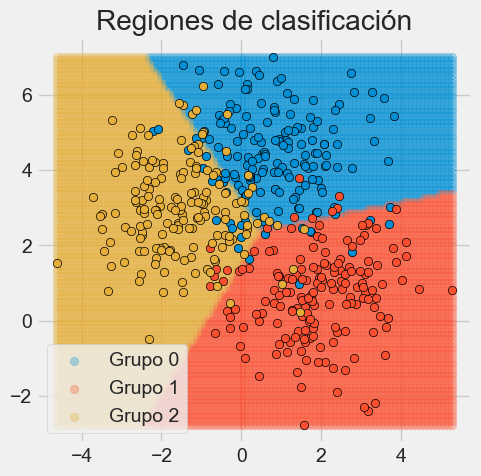

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for i in np.unique(predicciones):
    ax.scatter(
        x = X_grid[predicciones == i, 0],
        y = X_grid[predicciones == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        #marker = 'o',
        alpha = 0.3,
        label= f"Grupo {i}"
    )

for i in np.unique(y):
    ax.scatter(
        x = X[y == i, 0],
        y = X[y == i, 1],
        c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i],
        marker    = 'o',
        edgecolor = 'black'
    )


ax.set_title('Regiones de clasificación')
ax.legend();

# Caso de uso: predicción de precios vivienda

El set de datos SaratogaHouses del paquete mosaicData de R contiene información sobre el precio de 1728 viviendas situadas en Saratoga County, New York, USA en el año 2006. Además del precio, incluye 15 variables adicionales:

price: precio de la vivienda.
lotSize: metros cuadrados de la vivienda.
age: antigüedad de la vivienda.
landValue: valor del terreno.
livingArea: metros cuadrados habitables.
pctCollege: porcentaje del vecindario con título universitario.
bedrooms: número de dormitorios.
firplaces: número de chimeneas.
bathrooms: número de cuartos de baño (el valor 0.5 hace referencia a cuartos de baño sin ducha).
rooms: número de habitaciones.
heating: tipo de calefacción.
fuel: tipo de alimentación de la calefacción (gas, electricidad o diesel).
sewer: tipo de desagüe.
waterfront: si la vivienda tiene vistas al lago.
newConstruction: si la vivienda es de nueva construcción.
centralAir: si la vivienda tiene aire acondicionado.
El objetivo es obtener un modelo capaz de predecir el precio del alquiler.

# Librerías

In [13]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modelado
# ==============================================================================
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn import set_config
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Datos

In [14]:
# Descarga de datos
# ==============================================================================
datos = pd.read_csv("SaratogaHouses.csv", sep=",")

# Se renombran las columnas para que sean más descriptivas
datos.columns = ["precio", "metros_totales", "antiguedad", "precio_terreno",
                 "metros_habitables", "universitarios", "dormitorios",
                 "chimenea", "banyos", "habitaciones", "calefaccion",
                 "consumo_calefacion", "desague", "vistas_lago",
                 "nueva_construccion", "aire_acondicionado"]

# Análisis exploratorio

Antes de entrenar un modelo predictivo, o incluso antes de realizar cualquier cálculo con un nuevo conjunto de datos, es muy importante realizar una exploración descriptiva de los mismos. Este proceso permite entender mejor qué información contiene cada variable, así como detectar posibles errores. Algunos ejemplos frecuentes son:

Que una columna se haya almacenado con el tipo incorrecto: una variable numérica está siendo reconocida como texto o viceversa.

Que una variable contenga valores que no tienen sentido: por ejemplo, para indicar que no se dispone del precio de una vivienda se introduce el valor 0 o un espacio en blanco.

Que en una variable de tipo numérico se haya introducido una palabra en lugar de un número.

Además, este análisis inicial puede dar pistas sobre qué variables son adecuadas como predictores en un modelo.

In [15]:
# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   precio              1728 non-null   int64  
 1   metros_totales      1728 non-null   float64
 2   antiguedad          1728 non-null   int64  
 3   precio_terreno      1728 non-null   int64  
 4   metros_habitables   1728 non-null   int64  
 5   universitarios      1728 non-null   int64  
 6   dormitorios         1728 non-null   int64  
 7   chimenea            1728 non-null   int64  
 8   banyos              1728 non-null   float64
 9   habitaciones        1728 non-null   int64  
 10  calefaccion         1728 non-null   object 
 11  consumo_calefacion  1728 non-null   object 
 12  desague             1728 non-null   object 
 13  vistas_lago         1728 non-null   object 
 14  nueva_construccion  1728 non-null   object 
 15  aire_acondicionado  1728 non-null   object 
dtypes: flo

Todas las columnas tienen el tipo de dato correcto.

In [16]:
# Número de datos ausentes por variable
# ==============================================================================
datos.isna().sum().sort_values()

precio                0
metros_totales        0
antiguedad            0
precio_terreno        0
metros_habitables     0
universitarios        0
dormitorios           0
chimenea              0
banyos                0
habitaciones          0
calefaccion           0
consumo_calefacion    0
desague               0
vistas_lago           0
nueva_construccion    0
aire_acondicionado    0
dtype: int64

Todas las columnas están completas, no hay valores ausentes.

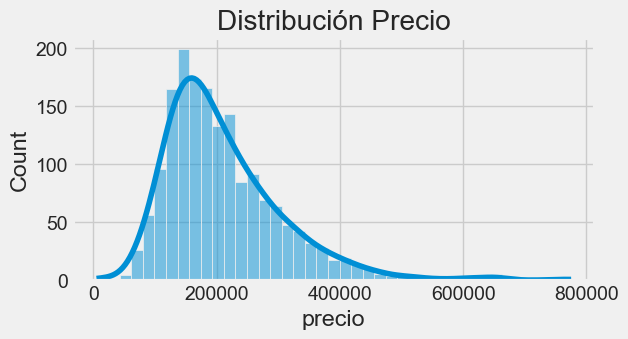

In [17]:
# Distribución variable respuesta
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 3))
sns.histplot(data=datos, x='precio', kde=True,ax=ax)
ax.set_title("Distribución Precio")
ax.set_xlabel('precio');

Los modelos de redes neuronales son de tipo no paramétrico, no asumen ningún tipo de distribución de la variable respuesta, por lo tanto, no es necesario que esta siga ninguna distribución concreta (normal, gamma...). Aun así, siempre es recomendable hacer un estudio mínimo, ya que, a fin de cuentas, es lo que interesa predecir. En este caso, la variable precio tiene una distribución asimétrica con una cola positiva debido a que, unas pocas viviendas, tienen un precio muy superior a la media.

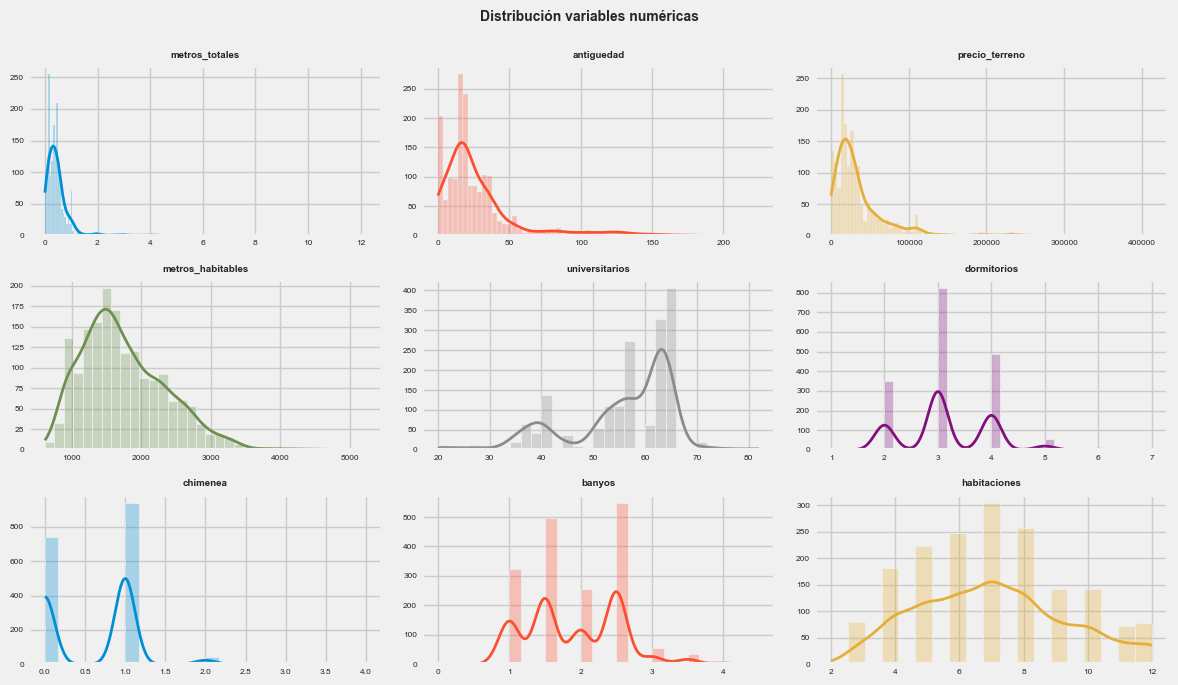

In [18]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 7))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")


fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

La variable chimenea, aunque es de tipo numérico, apenas toma unos pocos valores y la gran mayoría de observaciones pertenecen a solo dos de ellos. En casos como este, suele ser conveniente tratar la variable como cualitativa.

In [19]:
# Valores observados de chimenea
# ==============================================================================
datos.chimenea = datos.chimenea.astype("str")
datos.chimenea.value_counts()

1    942
0    740
2     42
4      2
3      2
Name: chimenea, dtype: int64

In [20]:
# Variables cualitativas (tipo object)
# ==============================================================================
datos.select_dtypes(include=['object']).describe()

,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1728,1728,1728,1728,1728,1728,1728
unique,5,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,942,1121,1197,1213,1713,1647,1093


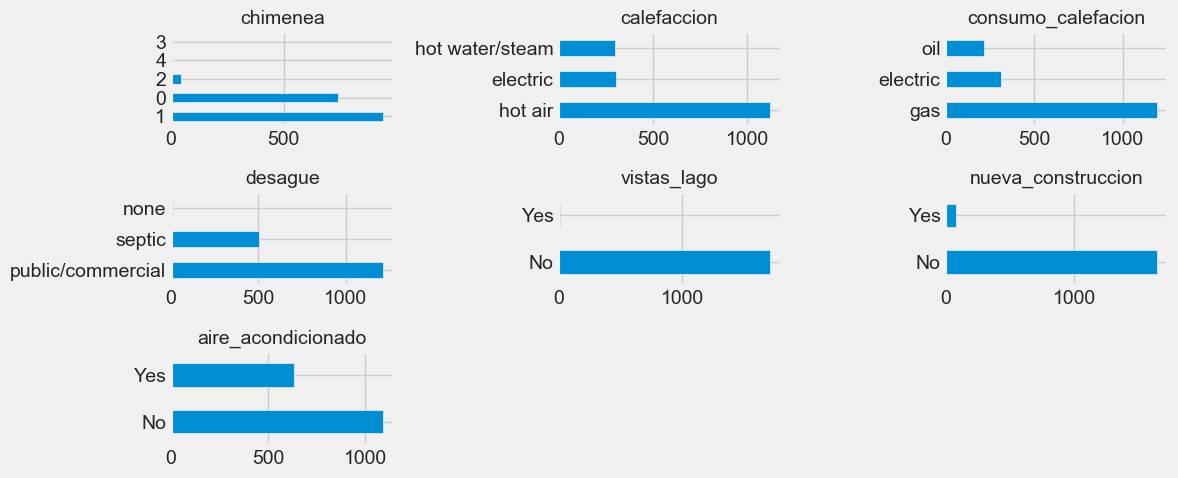

In [21]:
# Gráfico para cada variable cualitativa
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 5))
axes = axes.flat
columnas_object = datos.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    datos[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 14)
    axes[i].set_xlabel("")

# Se eliminan los axes vacíos
for i in [7, 8]:
    fig.delaxes(axes[i])

fig.tight_layout()

Si alguno de los niveles de una variable cualitativa tiene muy pocas observaciones en comparación a los otros niveles, puede ocurrir que, durante la validación cruzada o bootstrapping, algunas particiones no contengan ninguna observación de dicha clase (varianza cero), lo que puede dar lugar a errores. Para este caso, hay que tener precaución con la variable chimenea. Se unifican los niveles de 2, 3 y 4 en un nuevo nivel llamado "2_mas".

In [22]:
dic_replace = {'2': "2_mas",
               '3': "2_mas",
               '4': "2_mas"}

datos['chimenea'] = datos['chimenea'] \
    .map(dic_replace) \
    .fillna(datos['chimenea'])
datos.chimenea.value_counts().sort_index()

0        740
1        942
2_mas     46
Name: chimenea, dtype: int64

# División train y test

Con el objetivo de poder estimar el error que comete el modelo al predecir nuevas observaciones, se dividen los datos en dos grupos, uno de entrenamiento y otro de test (80%, 20%).

In [23]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    datos.drop('precio', axis = 'columns'),
    datos['precio'],
    train_size   = 0.8,
    random_state = 1234,
    shuffle      = True
)

Tras realizar el reparto, se verifica que los dos grupos son similares.

In [24]:
print("Partición de entrenamento")
print("-----------------------")
display(y_train.describe())
display(X_train.describe())
display(X_train.describe(include = 'object'))
print(" ")

print("Partición de test")
print("-----------------------")
display(y_test.describe())
display(X_test.describe())
display(X_test.describe(include = 'object'))

Partición de entrenamento
-----------------------


count      1382.000000
mean     211436.516643
std       96846.639129
min       10300.000000
25%      145625.000000
50%      190000.000000
75%      255000.000000
max      775000.000000
Name: precio, dtype: float64

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,0.501331,27.494211,34232.141823,1755.940666,55.439942,3.165702,1.902677,7.073082
std,0.671766,28.212721,35022.662319,621.262215,10.356656,0.825487,0.660053,2.315395
min,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,2.000000
25%,0.170000,13.000000,15100.000000,1302.000000,52.000000,3.000000,1.500000,5.000000
50%,0.370000,19.000000,25000.000000,1650.000000,57.000000,3.000000,2.000000,7.000000
75%,0.540000,33.750000,39200.000000,2127.250000,63.000000,4.000000,2.500000,9.000000
max,8.970000,201.000000,412600.000000,4856.000000,82.000000,7.000000,4.500000,12.000000


,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,1382,1382,1382,1382,1382,1382,1382
unique,3,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,741,915,972,970,1370,1321,863


 
Partición de test
-----------------------


count       346.000000
mean     214084.395954
std      104689.155889
min        5000.000000
25%      139000.000000
50%      180750.000000
75%      271750.000000
max      670000.000000
Name: precio, dtype: float64

,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,banyos,habitaciones
count,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,0.495751,29.601156,35855.491329,1751.121387,56.078035,3.109827,1.890173,6.916185
std,0.798240,32.884116,35035.761216,615.486848,10.239861,0.783575,0.652368,2.319776
min,0.010000,0.000000,300.000000,792.000000,20.000000,1.000000,1.000000,2.000000
25%,0.160000,13.000000,15100.000000,1296.000000,52.000000,3.000000,1.500000,5.000000
50%,0.370000,19.000000,26700.000000,1608.000000,57.000000,3.000000,2.000000,7.000000
75%,0.557500,34.000000,45950.000000,2181.000000,64.000000,4.000000,2.500000,8.000000
max,12.200000,225.000000,233000.000000,5228.000000,82.000000,6.000000,4.000000,12.000000


,chimenea,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
count,346,346,346,346,346,346,346
unique,3,3,3,3,2,2,2
top,1,hot air,gas,public/commercial,No,No,No
freq,201,206,225,243,343,326,230


# Preprocesado

Los modelos de redes neuronales requieren como mínimo de dos tipos de preprocesado: binarización (One hot ecoding) de las variables categóricas y estandarización de las variables continuas.

In [25]:
# Selección de las variables por típo
# ==============================================================================
# Se estandarizan las columnas numéricas y se hace one-hot-encoding de las
# columnas cualitativas. Esto porque son variables que se miden a diferentes escalas lo cual 
# no contribuye por igual a la función de ajuste del modelo y a la función aprendida del modelo
# y pueden terminar creando un sesgo
# Para mantener las columnas a las que no se les aplica
# ninguna transformación se tiene que indicar remainder='passthrough'.

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas, aquí se estándarizan los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough'
)

In [26]:
set_config(display='diagram')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['metros_totales', 'antiguedad',
                                  'precio_terreno', 'metros_habitables',
                                  'universitarios', 'dormitorios', 'banyos',
                                  'habitaciones']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefacion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])])

In [27]:
set_config(display='text')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('numeric',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['metros_totales', 'antiguedad',
                                  'precio_terreno', 'metros_habitables',
                                  'universitarios', 'dormitorios', 'banyos',
                                  'habitaciones']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['chimenea', 'calefaccion',
                                  'consumo_calefacion', 'desague',
                                  'vistas_lago', 'nueva_construccion',
                                  'aire_acondicionado'])])

In [28]:
# Se aprenden y aplican las transformaciones de preprocesado
# ==============================================================================
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep  = preprocessor.transform(X_test)

In [31]:
# Convertir el output en dataframe y añadir el nombre de las columnas
# ==============================================================================
encoded_cat = preprocessor.named_transformers_['cat']['onehot'] \
    .get_feature_names_out(cat_cols)
labels = np.concatenate([numeric_cols, encoded_cat])
datos_train_prep = preprocessor.transform(X_train)
datos_train_prep = pd.DataFrame(datos_train_prep, columns=labels)
datos_train_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   metros_totales               1382 non-null   float64
 1   antiguedad                   1382 non-null   float64
 2   precio_terreno               1382 non-null   float64
 3   metros_habitables            1382 non-null   float64
 4   universitarios               1382 non-null   float64
 5   dormitorios                  1382 non-null   float64
 6   banyos                       1382 non-null   float64
 7   habitaciones                 1382 non-null   float64
 8   chimenea_0                   1382 non-null   float64
 9   chimenea_1                   1382 non-null   float64
 10  chimenea_2_mas               1382 non-null   float64
 11  calefaccion_electric         1382 non-null   float64
 12  calefaccion_hot air          1382 non-null   float64
 13  calefaccion_hot wa

Si bien realizar el preprocesado de forma separada del entrenamiento es útil para explorar y confirmar que las transformaciones realizadas son las deseadas, en la práctica, es más adecuado asociarlo al propio proceso de entrenamiento. Esto puede hacerse fácilmente en los modelos de scikit-learn con los Pipeline.

# Modelado

## Pipepeline de preprocesado + modelolado

In [32]:
# Pipeline de preprocedado y modelado
# ==============================================================================

# Identificación de columnas numéricas y categóricas
numeric_cols = X_train.select_dtypes(include=['float64', 'int']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()


# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
    steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))]
)

preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, cat_cols)
    ],
    remainder='passthrough'
)

# Se combinan los pasos de preprocesado y el modelo en un mismo pipeline
pipe = Pipeline([('preprocessing', preprocessor),
                 ('modelo', MLPRegressor(solver = 'lbfgs', max_iter= 1000))])

In [33]:
# Espacio de búsqueda de cada hiperparámetro
# ==============================================================================
param_distributions = {
    #hidden_layer_sizestupla, length = n_layers - 2, default=(100,)
    #El elemento i-ésimo representa el número de neuronas en la i-ésima capa oculta.
    'modelo__hidden_layer_sizes': [(10), (20), (10, 10)],
    #alphafloat, default=0.0001
    #Parámetro de penalización L2 (término de regularización).
    'modelo__alpha': np.logspace(-3, 3, 10),
    # learning_rate_initdouble, default=0.001
    #La tasa de aprendizaje inicial utilizada. Controla el tamaño del paso en la actualización de las #ponderaciones. Sólo se utiliza cuando solver=”sgd” o “adam”.
    'modelo__learning_rate_init': [0.001, 0.01],
}

# Búsqueda por validación cruzada
# ==============================================================================
grid = RandomizedSearchCV(
    estimator  = pipe,
    param_distributions = param_distributions,
    n_iter     = 50,
    scoring    = 'neg_mean_squared_error',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = 5,
    verbose    = 0,
    random_state = 123,
    return_train_score = True
)

grid.fit(X = X_train, y = y_train)

# Resultados del grid
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(10)

,param_modelo__learning_rate_init,param_modelo__hidden_layer_sizes,param_modelo__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
32,0.01,10,0.004642,-3.329598e+09,7.474789e+08,-2.501024e+09,2.349204e+08
26,0.001,10,0.004642,-3.451515e+09,6.219304e+08,-2.474541e+09,1.552798e+08
20,0.001,10,0.021544,-3.452640e+09,5.117364e+08,-2.596397e+09,2.222519e+08
44,0.01,10,0.464159,-3.462988e+09,7.948989e+08,-2.376282e+09,2.508562e+08
48,0.01,"(10, 10)",46.415888,-3.480383e+09,8.444161e+08,-2.504155e+09,1.902867e+08
18,0.001,10,2.154435,-3.486222e+09,7.312789e+08,-2.612385e+09,1.668347e+08
4,0.01,10,46.415888,-3.507411e+09,5.519582e+08,-2.572775e+09,8.643245e+07
31,0.001,10,215.443469,-3.508699e+09,6.125136e+08,-2.443063e+09,1.535568e+08
15,0.001,10,0.001,-3.512348e+09,7.423594e+08,-2.448796e+09,2.057541e+08
30,0.01,10,10.0,-3.529164e+09,6.168959e+08,-2.493386e+09,1.805604e+08


# Error de test

Aunque mediante los métodos de validación (Kfold, LeaveOneOut) se consiguen buenas estimaciones del error que tiene un modelo al predecir nuevas observaciones, la mejor forma de evaluar un modelo final es prediciendo un conjunto test, es decir, un conjunto de observaciones que se ha mantenido al margen del proceso de entrenamiento y optimización.

In [36]:
# Error de test
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo_final.predict(X = X_test)
rmse = mean_squared_error(
    y_true = y_test,
    y_pred = predicciones,
    squared = False
)
print('Error de test (rmse): ', rmse)
print('Predicciones: ', predicciones)

Error de test (rmse):  63721.148859930334
Predicciones:  [122548.73211317 166769.80731482 161902.58392114 144383.19718247
 234968.40490709 233591.03889554 150650.07339534 267854.36923822
 327167.91917821 155800.49375278 193990.85813795 153450.58665062
 169072.17845534 212852.80004057 145968.37571882 230231.89279448
 150563.9413907  115813.56843053 275523.53130141 172617.95992736
 235465.29082286 226487.02791526 129075.04938027 290747.33944144
 426486.78768855 151177.67225485 201442.73419343 166952.38672468
 445154.45142983 352833.36591109 123647.15199446 141857.84283114
 175218.32795729 170357.02519793 245981.71193724 128655.05327299
 173063.0349072  196788.87345513 105482.18455652 285448.75265973
 178967.60133267 166627.57418005 168292.52611745 220227.62959641
 375792.06672285 189572.58234987 244643.13280171 266370.91207719
 161612.69113498 173125.52993326 245394.1222918  150938.37436358
 150909.13252752 165479.2352197  242010.93761238 144350.32605601
 283943.10439968 216460.05347824 

# Conclusión

La combinación de hiperparámetros con la que se obtienen mejores resultados acorde a las metricas de validación cruzada es:

In [37]:
modelo_final['modelo'].get_params()

{'activation': 'relu',
 'alpha': 0.004641588833612777,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': 10,
 'learning_rate': 'constant',
 'learning_rate_init': 0.01,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

El error del modelo (rmse) al aplicarlo al conjunto de test es de 65359.

# Información de sesión

In [38]:
from sinfo import sinfo
sinfo()

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
matplotlib          3.8.1
numpy               1.23.5
pandas              1.5.3
pydev_jupyter_utils NA
pydev_jupyter_vars  NA
seaborn             0.11.2
sinfo               0.3.4
sklearn             1.4.1.post1
-----
IPython             8.17.2
jupyter_client      7.4.7
jupyter_core        4.11.2
jupyterlab          3.5.0
notebook            6.5.2
-----
Python 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.19045-SP0
8 logical CPU cores, Intel64 Family 6 Model 94 Stepping 3

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).